<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>
 Summer Olympics Games Project - By Harjeet Kaur

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Pre-Processing](#section303)<br/>
    - 3.4 [Post-Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many times Olympics games hosted till date and which country hosted the maximum Olympics games?](#section401)<br/>
      - 4.1.1 [Which cities hosted the Olympics more than once ?](#section4011)<br/>
    - 4.2 [How the Participation level has changed over the years in Olympic History ?](#section402)<br/>
      - 4.2.1 [What is the maximum and minimum number of nation participated in Olympics history?](#section4022)<br/>  
    - 4.3 [What is the MAX Medal Won Count by countries per year?](#section403)<br/>
      - 4.3.1 [What is the Total medal won count per year?](#section4031)<br/>
      - 4.3.2 [Which are the MAX GOLD won Countries?](#section4032)<br/>
      - 4.3.3 [What is the count of GOLD,SILVER,BRONZE medal per year?](#section4033)<br/>
    - 4.A [Men and Women Performance?](#section5)<br/>
    - 4.4 [What is the medal won count between Men and Women in each Olympic year?](#section404)<br/>
        - 4.4.1 [Women Performance in Olympic history ](#section4041)<br/>
        - 4.4.2 [Men and Women medals won percentage ?](#section4042)<br/>
    - 4.5 [Display the Medal Tally (Gold,Silver,Bronze) of each Country in each Olympics year.](#section405)<br/>
    - 4.6 [Which Country won the Max number of Gold,Silver,Bronze Medal in Olympic History ?](#section406)<br/>
    - 4.7 [Which Country won the Olympics games more than __ONCE__ .](#section407)<br/>
    - 4.8 [Which are the __Top Three__ Countries in Olympic History over the period ?](#section408)<br/>
    - 4.9 [How the performance of women in Olympics changed over the period ?](#section409)<br/>
    - 4.10 [Indian Performance in Olympic history ?](#section410)<br/>
        -4.10.1 [Top 10 Indian Athlete in Olympic history ?](#section4101)<br/>
    - 4.11 [Which Athlete won the maximum number of medals in Swimming in Olympics History ?.](#section411)<br/>
    - 4.12 [Top 10 Men Athlete in Olympic History ?.](#section412)<br/>
    - 4.13 [Top 10 Women Athlete in Olympic History ?.](#section413)<br/>
    - 4.14 [10 new Sports being added in Olympic History ?.](#section414)<br/>
    - 4.15 [Top 5 Sports in Olympic History ?.](#section414)<br/>
5. [Conclusions](#section600)<br/>  

<a id=section1></a>
### 1. Problem Statement

This notebook provides the data analysis for __Summer Olympics games__ dataset and figure out interesting __statistics__ and _insight_ about Olympics games being held till year 2012. 

* __Olympics Games EDA__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

# <a id=section2></a>
### 2. Data Loading and Description
<img src="Rio-Olympics.jpg" width="540" height="760"/>

- This dataset consists of information about Country,Year,Event,Discipline and Medal won by athlete in different Olympics games.
- It contains around __31165__ rows with medal won information about __148__ distinct countries in __666__ distinct events in  the Olympics Games history.
- •The dataset comprises of 31165 observations of 9 columns. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Year          | Olympic Year                                              | 
| City          | City Where the Olympics games being held on.              |  
| Sport         | Sport in Olympics e.g Aquatics                            | 
| Discipline    | Discipline of game under Sport like Swimming in Aquatics  |                                         |   
| Athlete       | Name of the Athlete                                       |
| Country       | Name of the Country e.g HUN for Hungry                    |
| Gender        | Gender of the Athlete. men or women                       |
| Event         | Event of the Sport e.g 100M race                          |
| Medal         | Medal won by Athlete (Gold,Silver,Bronze)                 |


In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns  

# Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

Olympics_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")


<a id=section3></a>
## 3. Data Profiling

<a id=section301></a>
### 3.1 Understanding the Olympics Data Set

- Let us analyze the Olympics dataset from number of rows and columns prespective

In [2]:
Olympics_df.shape

(31165, 9)

- Summer Olympics dataset has 31165 rows spread in 9 columns. Let us explore the columns further.

In [3]:
Olympics_df.columns[:]   #It shows the different columns names and its dtype as Object

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [4]:
Olympics_df.columns[-2:] #It will show you last two columns of dataset

Index(['Event', 'Medal'], dtype='object')

In [5]:
Olympics_df.info()  # Info gives details about total entries (rows),their datatype,Null or not null info. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


#### Olympic dataset has only ONE numeric column as Year and rest all the columns are Object type or Categorical in nature.

In [6]:
Olympics_df.isnull().sum()   #Check for Null values in dataset

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

#### There are four null values for __Country__ column

In [7]:
Olympics_df.duplicated().sum() #Check for Duplicates values

2

#### The above result shows __2__ duplicates rows values in dataset

In [8]:
Olympics_df.head()  #Getting the top 5 rows of dataset.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
Olympics_df.tail()  #Getting the bottom 5 rows in dataset

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [10]:
Olympics_df.Discipline.unique() #Unique Discipline in Dataset

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [11]:
Olympics_df.Event.unique() #Unique Event in Dataset

array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Doubles', 'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chap

In [12]:
Olympics_df.City.unique() #unique cities

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [13]:
Olympics_df.Athlete.nunique() # Distinct Athlete participated

22762

<a id=section302></a>
### 3.2 Pre-Profiling

#### Generating Pandas Pre-profiling, an interactive HTML Report using Pre-profiling feature to describe the 
#### Olympics dataset and visual representation of some of their columns

In [14]:
profile = pandas_profiling.ProfileReport(Olympics_df)
profile.to_file(outputfile="OlympicsDataset_before_preprocessing.html")

This HTML report gives the summary about the Olympics dataset and describe about the number of rows, columns, their missing values,and also provide insight about each column like distinct values in Country column or total number of Gold,Silver and Bronze medal won in the Olympic history.

<a id=section303></a>
### Pre-processing

- Dealing with duplicates and missing values<br/>
    - Dropping the duplicates rows entries.
    - Replacing missing values of __Country__ with Mode values.
    

In [15]:
Olympics_df.drop_duplicates(inplace=True) #It will drop the duplicates rows from the original dataset because of inplace as True.


In [16]:
Olympics_df.duplicated().sum()  #Check for duplicates rows after deletion

0

The above result shows that the duplicates rows from the Olympic dataset get removed.

In [17]:
Olympics_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [18]:
Country_Mode = Olympics_df["Country"].mode()
Olympics_df["Country"].fillna(Country_Mode,inplace=True)


Replace the __4 missing values of Country with __Mode__ of Olympics["Country"]

<a id=section304></a>
### Post Profiling

After processing the missing and duplicates values and now again generate the profile.


In [19]:
profile = pandas_profiling.ProfileReport(Olympics_df)
profile.to_file(outputfile="OlympicsDataset_After_preprocessing.html")

This will generate a HTML post profiling to show the processed data with on missing values.

<a id=section4></a>
## Questions

# <a id=section401></a>
### How many times Olympics games hosted till date and which country hosted the maximum Olympics games?

In [20]:
#1.	How many times the Olympics hosted till 2012?
print("Number of times the Olympics has been hosted since 1896 :- ",len(pd.unique(Olympics_df["Year"])))
print("Number of Distinct cities hosted the games ",Olympics_df["City"].nunique())

Number of times the Olympics has been hosted since 1896 :-  27
Number of Distinct cities hosted the games  22


# <a id=section4011></a>
### Which cities hosted the Olympics more than once ?

In [21]:
#2.	Which City hosted the Olympics maximum number of times ?

print(Olympics_df.loc[:, ['Year', 'City']].drop_duplicates()['City'].value_counts().sort_values(ascending=False).head(1))


London    3
Name: City, dtype: int64


In [22]:
# Which Cities has hosted the Olympics more than ONCE

host_City = Olympics_df.loc[:, ['Year', 'City']].drop_duplicates()["City"].value_counts(ascending=False).rename_axis('City').to_frame('Count')
host_City = host_City[host_City["Count"]>1].reset_index()
host_City

,City,Count
0,London,3
1,Los Angeles,2
2,Paris,2
3,Athens,2


The below bar graph shows the Cities which hosted the Olympics games more than Once in Olympics history.
__London__ being the only City hosted the Olympics __THREE__ times whereas Athens,Paris and Los Angeles hosted twice each.

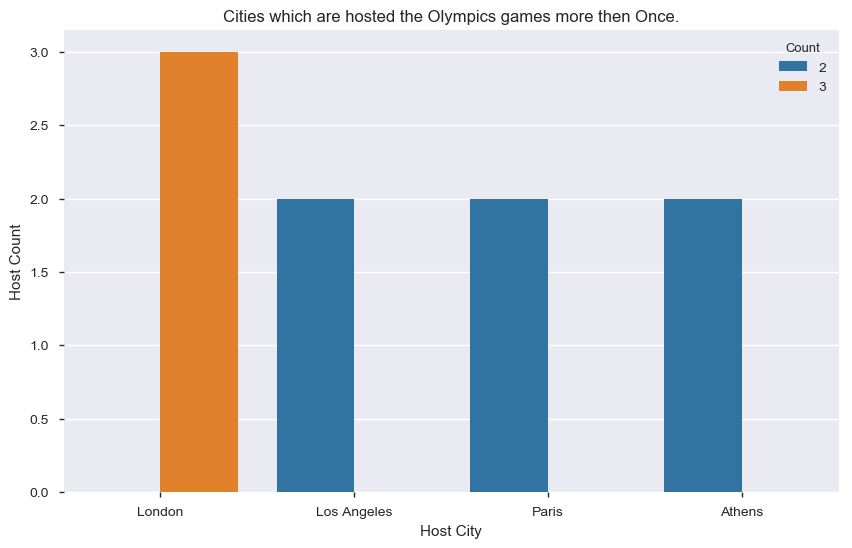

In [23]:
fig = plt.figure(figsize=(10, 6))

ax=sns.barplot(data=host_City,x='City',y='Count',hue='Count')
ax.set(xlabel='Host City', ylabel='Host Count')


#Setting axis
plt.xlabel('Host City')
plt.ylabel('Host Count')
plt.title("Cities which are hosted the Olympics games more then Once.")
fig.savefig("HostCity1.png",dpi=fig.dpi)


<a id=section402></a>
###  How the Participation level has changed over the years in Olympic History?

In [24]:
# 	How many countries participated in each Olympics?
Olympics_df.groupby('Year').nunique()[['Country']]

,Country
Year,
1896,11
1900,20
1904,10
1908,19
1912,18
1920,22
1924,27
1928,32
1932,27


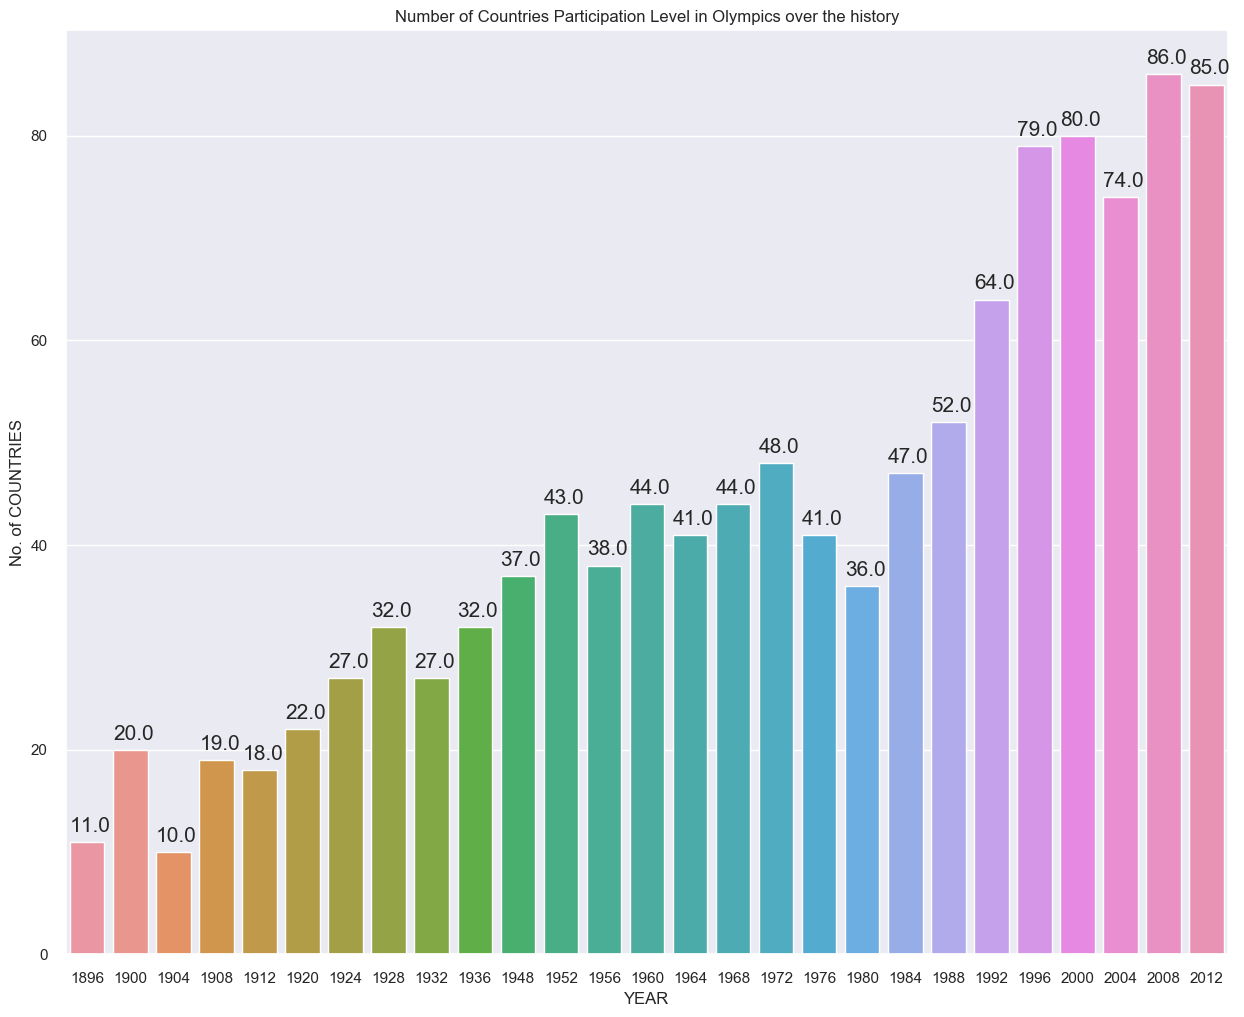

In [25]:
groupYearCountry = Olympics_df.groupby('Year').nunique()[['Country']].reset_index()
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.barplot(x='Year',y='Country',data=groupYearCountry)
plt.xlabel("YEAR")
plt.ylabel("No. of COUNTRIES")
plt.title("Number of Countries Participation Level in Olympics over the history")
plt.savefig("CountryParticipated.png",dpi=fig.dpi)

#Displaying values on bar
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+1),fontsize=15)

The below graph explain the participation of number of countries over the period of Olympics history. In 1896, when it was </br>
started , there were only __10__ countries participated from the world which rises to __86__ by the end of year 2012.It shows the upward positive trends in term of number of countries particiapted in Olympics</br>
The participation level almost above __80 nations__ from year 1996 onwards. Probably people among different nations become more </br>
about Olympics games and it become a world wide festival now.

# <a id=section4022></a>
### What is the maximum and minimum number of nation participated in Olympics history?

In [26]:
# What are the maximum number of countries participated and minimum number of countries participated in Olympics games.
print("Maximum number of Countries participated in Olympics ",Olympics_df.groupby('Year').nunique()[['Country']].max())

Maximum number of Countries participated in Olympics  Country    86
dtype: int64


In [27]:
# What are the maximum number of countries participated and minimum number of countries participated in Olypics games.
print("Minimum number of Countries participated in Olympics ",Olympics_df.groupby('Year').nunique()[['Country']].min())

Minimum number of Countries participated in Olympics  Country    10
dtype: int64


# <a id=section2></a>
###  Medals Won in Olympics
<img src="MedalPic.jpg" width="540" height="760"/>

<a id=section4031></a>
### What is the Total medal won count per year ?

In [28]:
#5.	Number of medals won in Olympics till date ? year wise?

numMedals = Olympics_df.groupby('Year').count()[['Medal']].reset_index()
print("Total Medals won year wise \n",numMedals)

TotalMedalWonInOlympics = Olympics_df.count()[['Medal']]
print("Total number of Medal won in Olympics till date ",TotalMedalWonInOlympics,)

Total Medals won year wise 
     Year  Medal
0   1896    151
1   1900    512
2   1904    470
3   1908    804
4   1912    885
5   1920   1298
6   1924    884
7   1928    710
8   1932    615
9   1936    875
10  1948    814
11  1952    889
12  1956    885
13  1960    882
14  1964   1010
15  1968   1031
16  1972   1185
17  1976   1305
18  1980   1386
19  1984   1459
20  1988   1546
21  1992   1705
22  1996   1859
23  2000   2015
24  2004   1998
25  2008   2042
26  2012   1948
Total number of Medal won in Olympics till date  Medal    31163
dtype: int64


# The below graph shows the rising trend in total number of medals won per year in Olympic history .

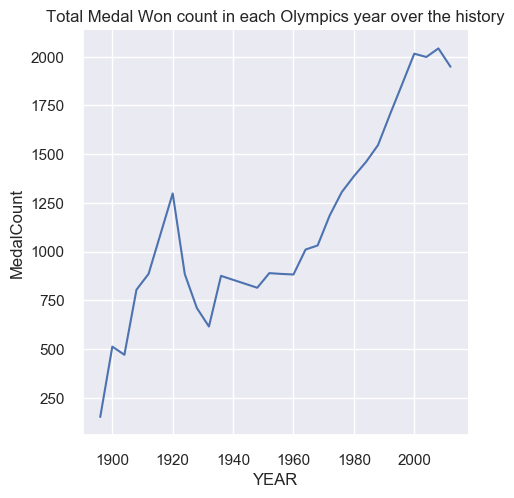

In [29]:

sns.set(rc={'figure.figsize':(15,15)})
plot = sns.relplot(x='Year',y='Medal',data=numMedals,kind='line')#.set_xticklabels(numMedals.Year,rotation=90)
plt.xlabel("YEAR")
plt.ylabel("MedalCount")
plt.title("Total Medal Won count in each Olympics year over the history")
plt.savefig("TotalMedalCount.png")



# <a id=section403></a>
### What is the Max Medal Won Countries per year ?

In [30]:
#Calculate the number of medals won by different countries in each Olympics?

df_Medal_Country= Olympics_df[['Year','Country','Sport','Medal']].copy()


#Medal count of each country in each Olympic year

df_Medal_tally = df_Medal_Country.groupby(['Year','Country'],as_index=True).count()[['Medal']]
df_Medal_tally

#Max number of medals won by country in each Olympics year from 1896

temp= df_Medal_tally.groupby(['Year']).max()[['Medal']].reset_index()

temp['Country'] = df_Medal_Country['Country']
temp

,Year,Medal,Country
0,1896,52,HUN
1,1900,185,AUT
2,1904,394,GRE
3,1908,347,GRE
4,1912,173,GRE
5,1920,193,GRE
6,1924,198,HUN
7,1928,84,GRE
8,1932,181,GRE
9,1936,210,AUT


The below graphs shows the countries who won the maximum medal in Olympic year. There are top __8__ dominating countries with max medal count.
__Austrialia__</br>
__Great Britain__</br>
__USA__</br>

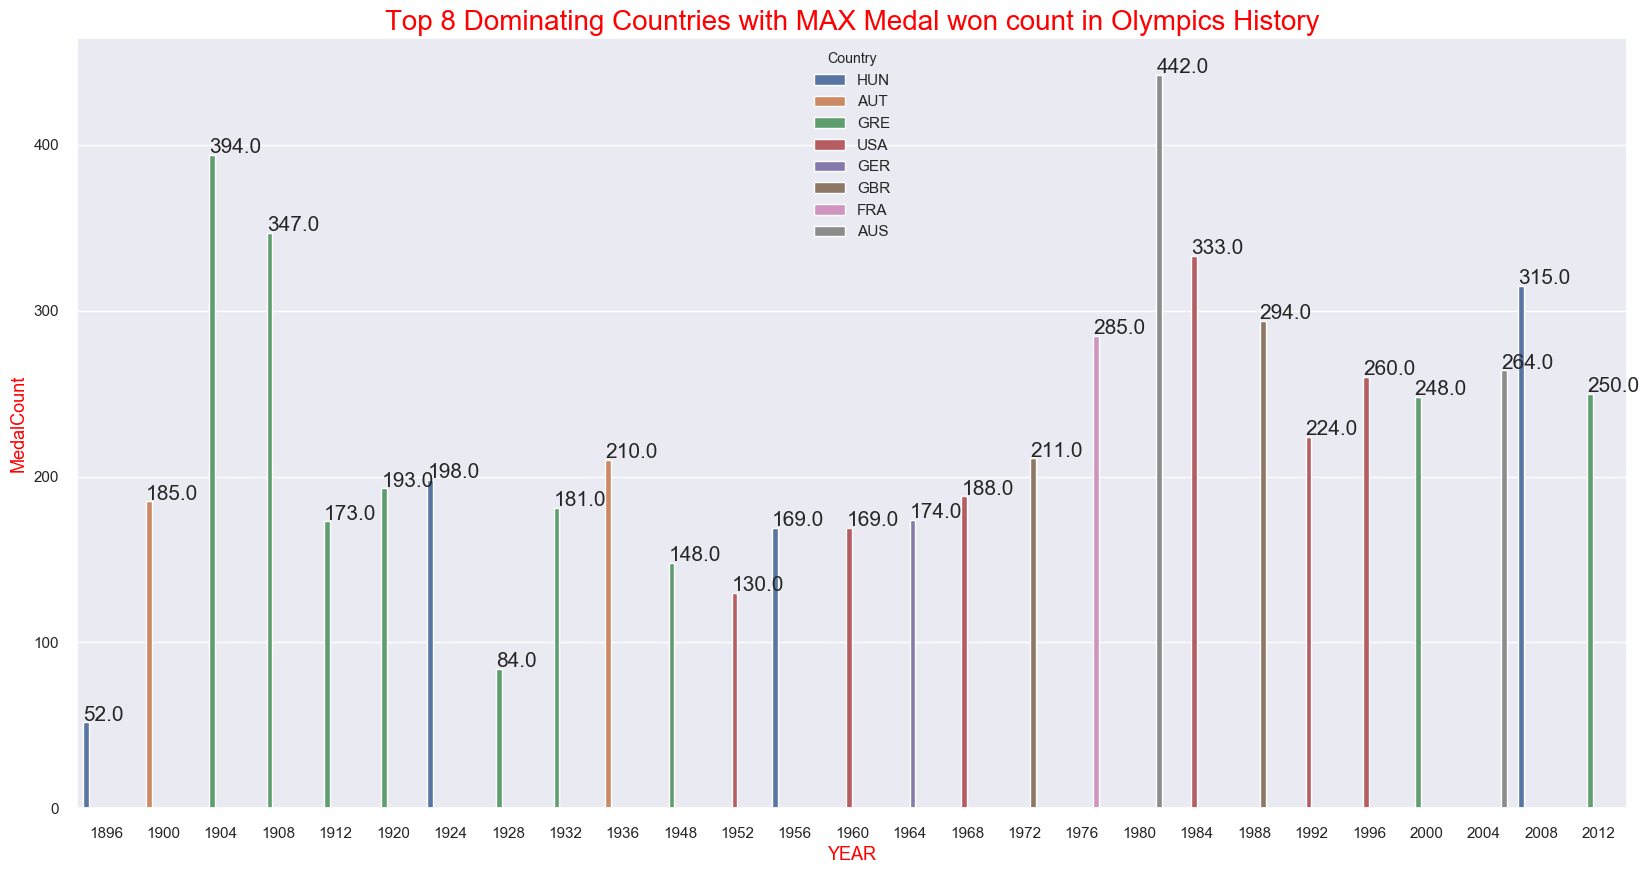

In [31]:
#plotting barplot
fig, ax = plt.subplots(figsize=(20,10))
ax= sns.barplot(x = 'Year',y = 'Medal',data = temp[:100],ax=ax, hue = 'Country')

#Series Setting
plt.xlabel("YEAR",size=13,color='red')
plt.ylabel("MedalCount",size=13,color='red')
plt.title("Top 8 Dominating Countries with MAX Medal won count in Olympics History",size=20,color='red')

#Displaying values on bar
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+1),fontsize=15)
plt.savefig("CountryWithMaxMedal.png")

<a id = section4302></a>
### Which are the MAX GOLD won Countries?

__URS__ , __USA__,__GBR__ were the Three MAX GOLD Won Countries in Olympics history. URS won maximum of 192 GOLD followed by USA with 162. 

In [32]:
MaxGoldMedalCountries = df_Medal_Country[df_Medal_Country["Medal"]=='Gold'].groupby(["Year","Country"])["Medal"].count().sort_values(ascending=False).head(10)
MaxGoldMedalCountries.reset_index()

,Year,Country,Medal
0,1980,URS,192
1,1984,USA,168
2,1996,USA,160
3,2012,USA,147
4,1904,USA,146
5,1908,GBR,144
6,1988,URS,134
7,2000,USA,130
8,2008,USA,125
9,2004,USA,116


The below bargraph shows the downwards trends in number of GOLD medal won.With 1990 being maximum with 192 GOLD medals to 116 GOLD in 2004.

This is because the more Disciplines and events are included and the total medal won count increased. This shows that the overall participation in games has increased over the years.

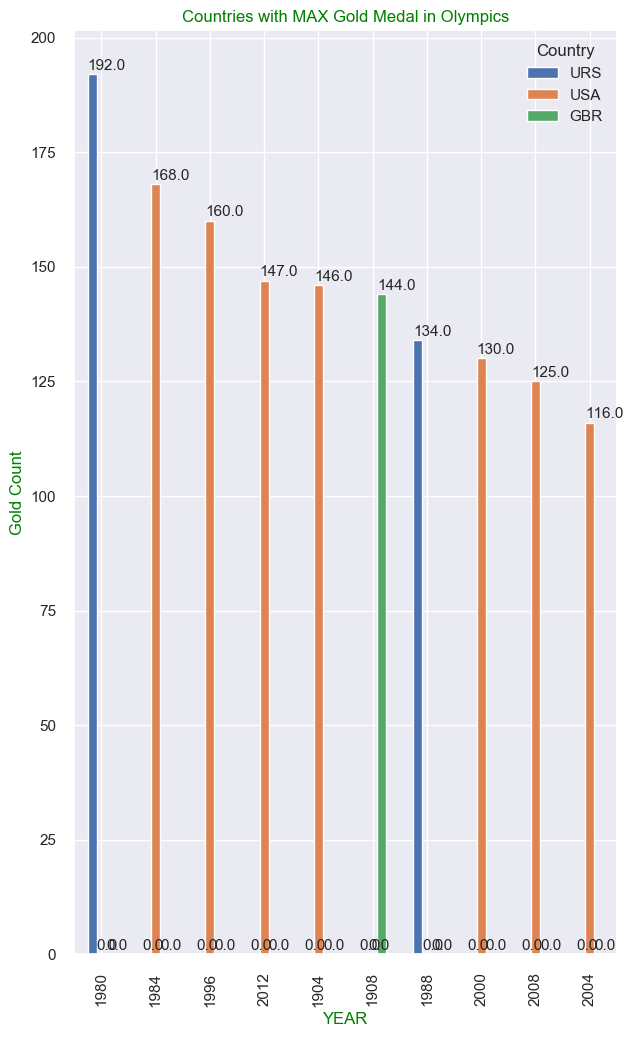

In [33]:
#Medal count of each country in each Olympic year
 
ax= MaxGoldMedalCountries.unstack().plot(kind = 'bar',figsize = (7,12))

#sns.lineplot(x='Year',y='Medal',data=MaxGoldMedalCountries,hue='Country')

#Series Setting
plt.xlabel("YEAR",color='green')
plt.ylabel("Gold Count",color='green')
plt.title("Countries with MAX Gold Medal in Olympics",color='green')


#Displaying values on bar
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+1),fontsize=11)
plt.savefig("MaxGoldMedalCount.png")

<a id=section4033></a>
### What is the count of GOLD,SILVER,BRONZE medal per year?

The below bar chart shows the comparsion between GOLD,SnILVER,BRONZE medal won count per year.\n

- In 1920, GOLD Medal count touches the 500 mark.
- From 1988 till 2012, GOLD medal count remains more than 500 in each Olympic games.
- The GOLD,SILVER medal count remain almost equal between 2000 and 2008.
- The Bronze medal count surpass the GOLD and SILVER in the year 2008

This has shows the more participation by alomost 86 nations which leads to high medal won count.

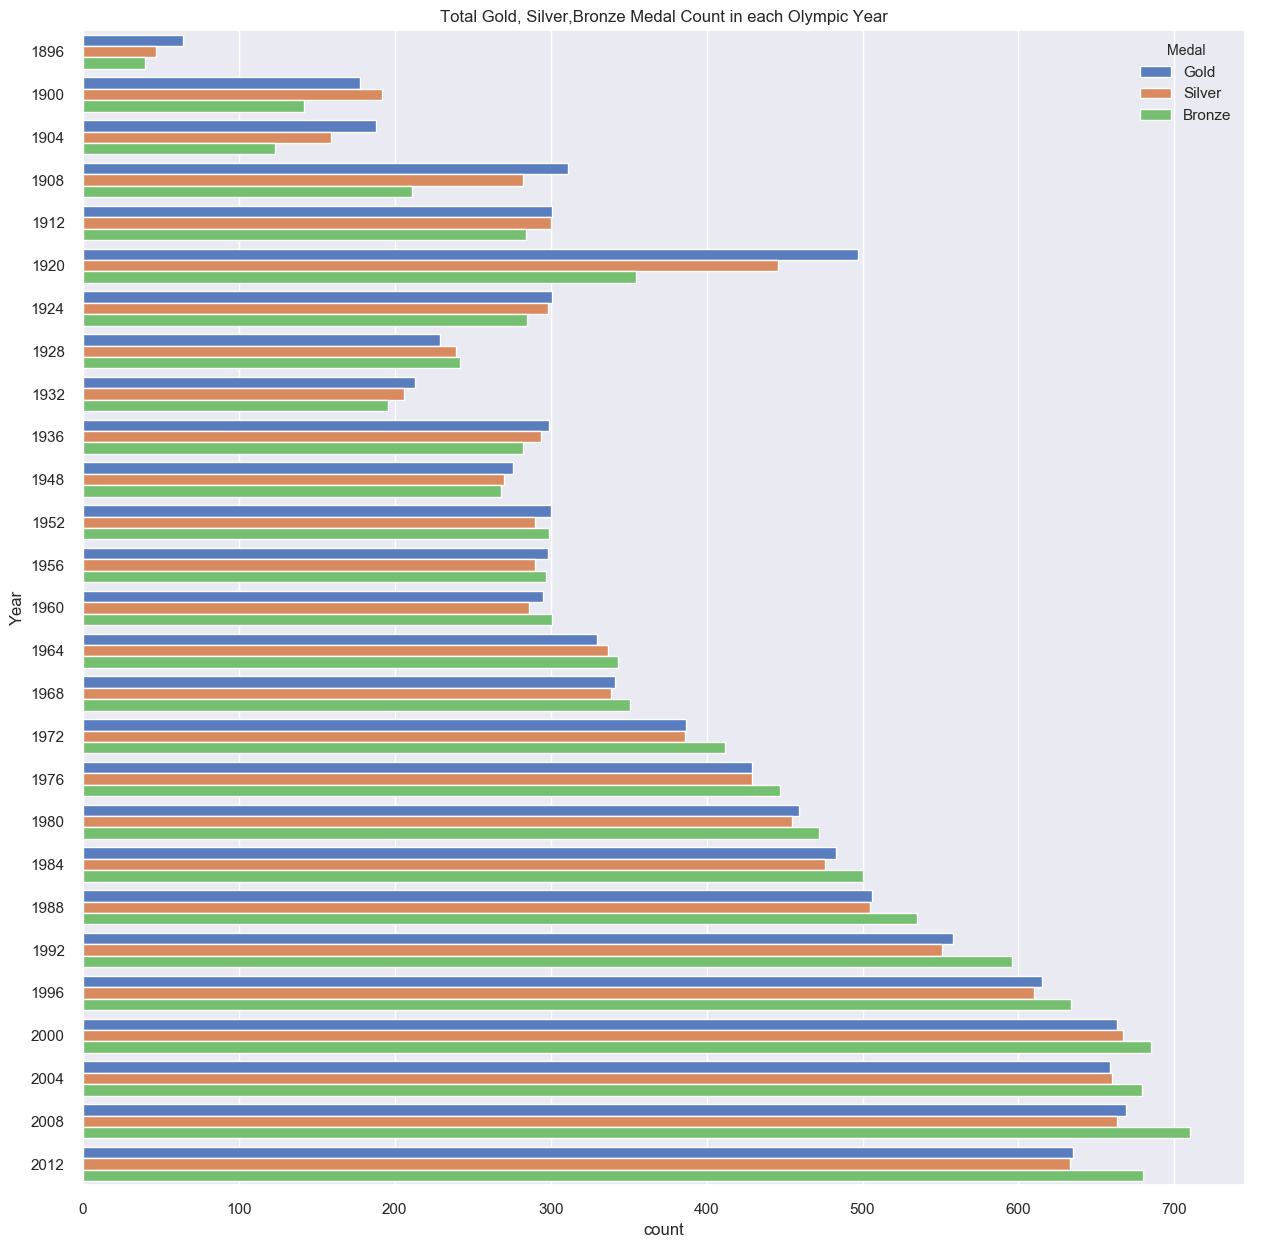

In [34]:

#Plot the graph
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Year',hue='Medal',data=Olympics_df).set_title("Total Gold, Silver,Bronze Medal Count in each Olympic Year")
plt.savefig("TotalGoldSilver.png")

<a id=section5></a>
### Men and Women Performance

<a id=section404></a>
### What is the medal won count betwen Men and Women in each Olympic year?

Medal Won count by Men and Women Athlete


In [ ]:
#10.	What is the Participation level of Men and Women in Olympics ?

groupbyGender = Olympics_df.groupby(['Year','Gender'])['Sport'].count().reset_index().rename(columns={"Sport":"count"})

sns.set(rc={'figure.figsize':(15,12)})
plot = sns.barplot(x='Year',y='count',hue='Gender',data=groupbyGender).set_xticklabels(groupbyGender.Year,rotation=92)
#Setting axis
plt.xlabel("YEAR")
plt.ylabel("Number of Athlete")
plt.title("Participation of Men and Women in Summer Olympics")
plt.savefig("participationMenWomen.png",dpi=fig.dpi)

The above graph shows the performance of Men and Women in Olympic year. Women performance has increased consistly from 1900 till 2012 and it shows that it will surpass in near future.

The below line graph shows the comparision between the performance of Men and women during the Olympic history. It show that
the women performing as good as men and they are going to converge in near future.

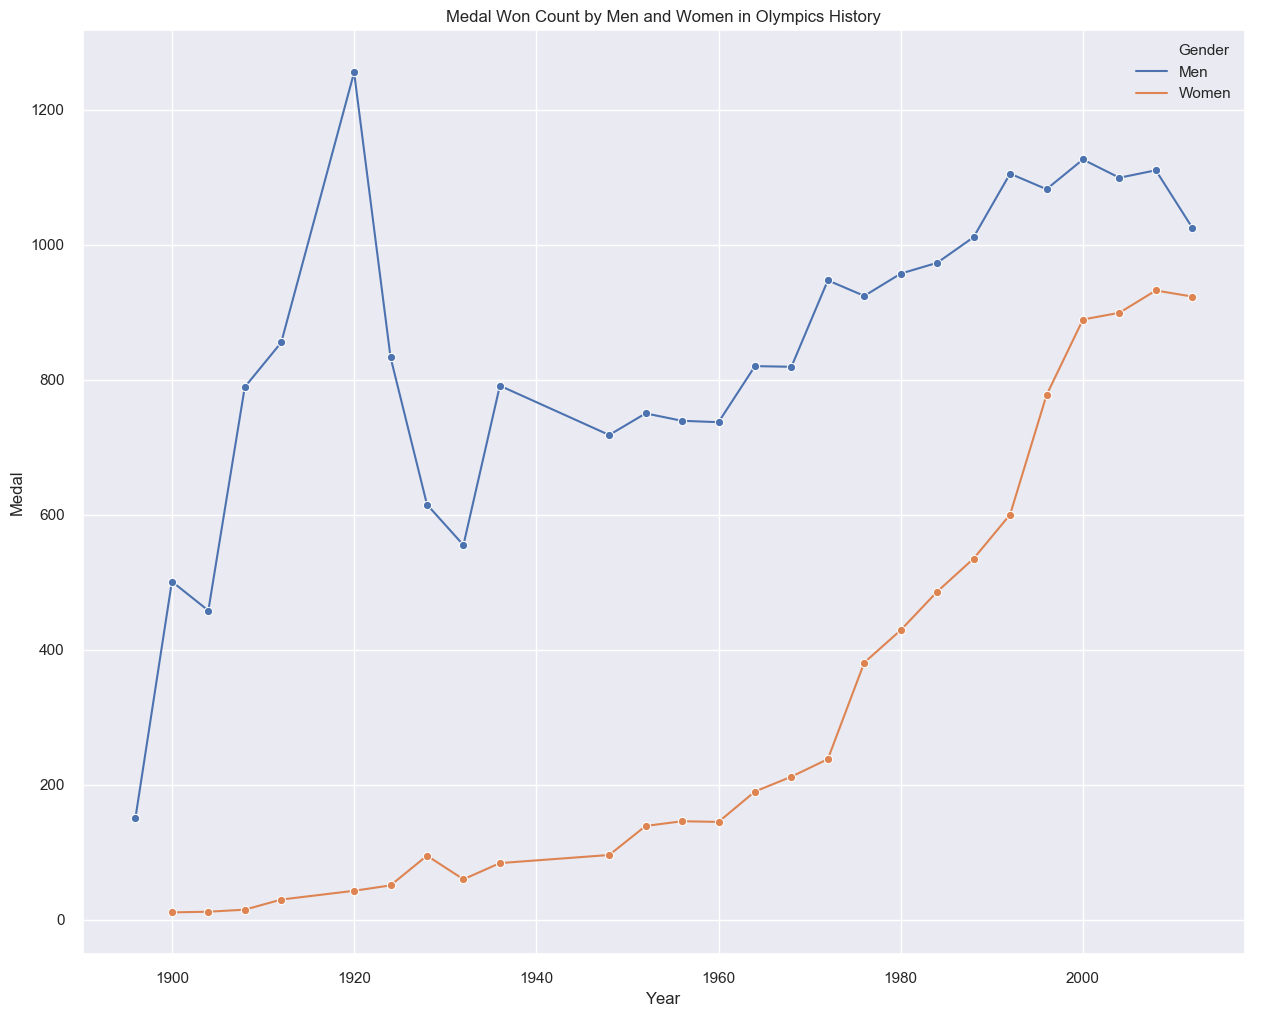

In [36]:
GenderMedalCount = Olympics_df.groupby(['Year','Gender']).count()[['Medal']].reset_index()
# Plot to show medal count of Men and Women in Olympics history
sns.set(rc={'figure.figsize':(15,12)})
plt.xlabel("YEAR")
plt.ylabel("MedalCount")
plt.title("Medal Won Count by Men and Women in Olympics History")
sns.lineplot(x='Year',y='Medal',data=GenderMedalCount,hue='Gender',marker='o')
plt.savefig("MenWomenPerformace.png")

<a id=section4041></a>
### Women Performance in Olympic history

The Below line graph shows the performance of women in Olympics. being Men dominating games, women were able to make their mark
 and able to compete with men in medal won count in Olympic history.
 There is highly uprising trend which starts from 1 or 2 medals in 1900 to close to 1000 medal by 2000.

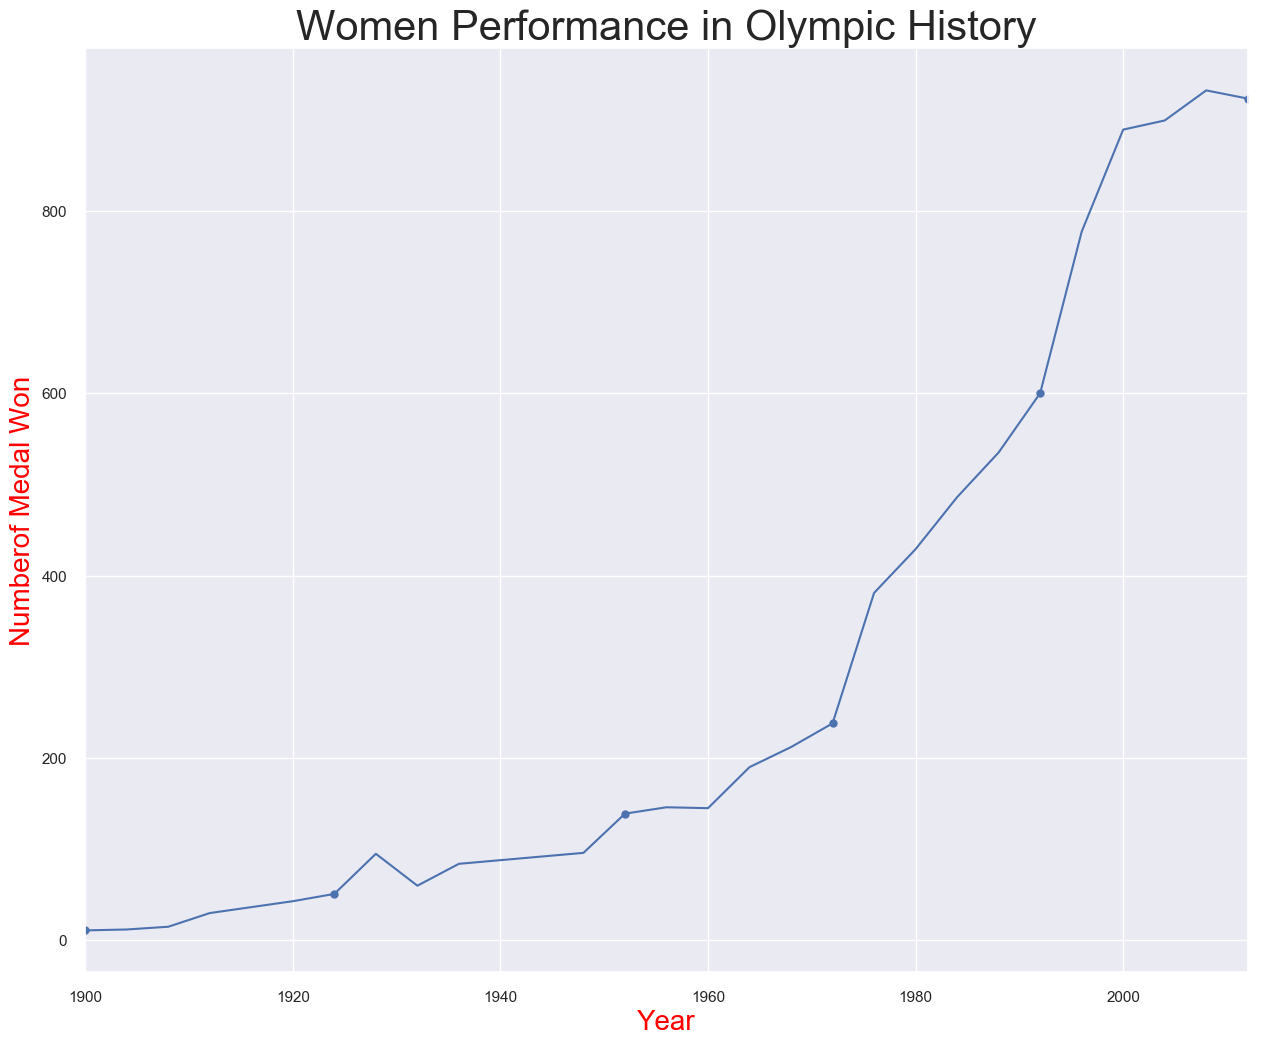

In [37]:
#Performance of Women in Olympics
Olympics_df[Olympics_df["Gender"]=='Women'].groupby('Year')['Medal'].count().plot.line(style=".-",markevery=5,marker='o')
plt.xlabel("Year",size=20,color="red")
plt.ylabel("Numberof Medal Won",color="red",size=20)
plt.title("Women Performance in Olympic History",size=30)
plt.savefig("WomenPerformance.png")

<a id=section4042></a>
### Men and women medal won percentage ?

__73%__ medals won by Men
__27%__ medals won by women.

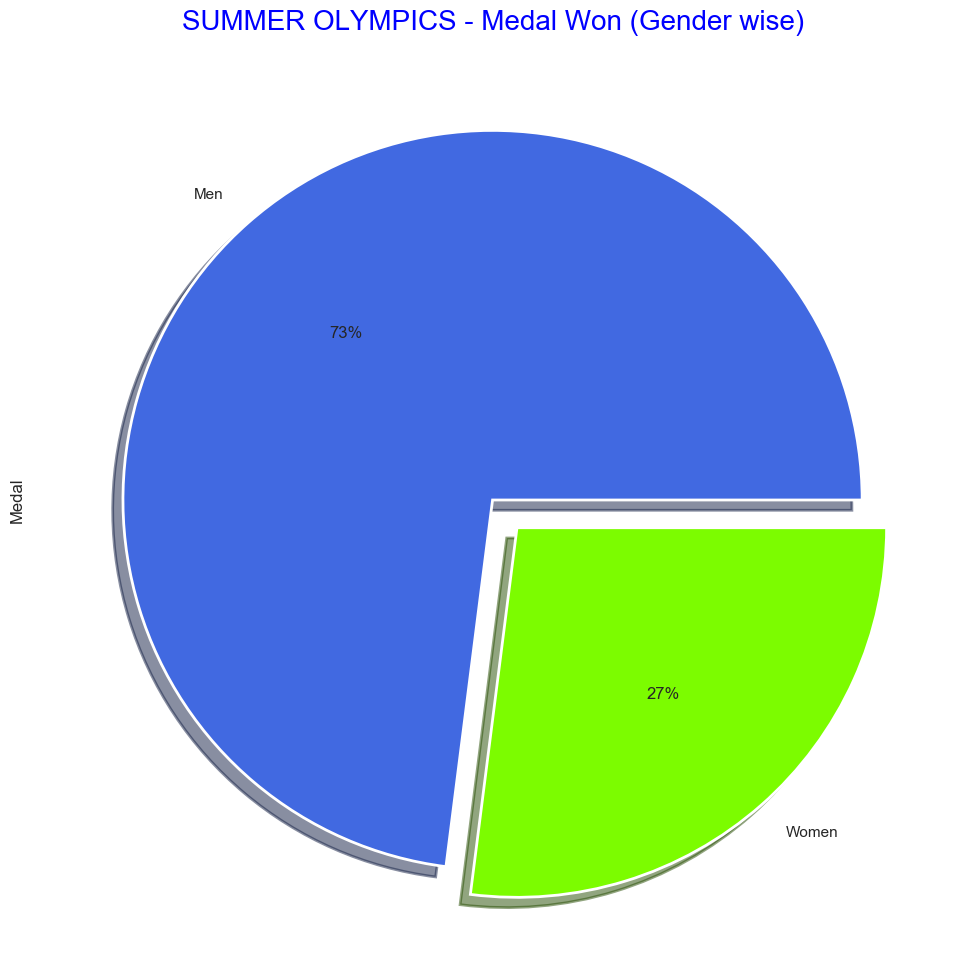

In [38]:
Olympics_df.groupby("Gender")['Medal'].count().plot.pie(autopct = "%1.0f%%",wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,0.1],shadow = True , 
                                               colors = ["royalblue","lawngreen"])
total_Medals=Olympics_df.groupby('Year')['Medal'].count().sum()
circ = plt.Circle((0,0),.7,color = "white")
plt.title("SUMMER OLYMPICS - Medal Won (Gender wise)",size=20,color='blue')
plt.savefig("MedalWonGender.png")


<a id=section405></a>
### Display the Medal Tally (Gold,Silver,Bronze) of each Country in each Olympic year.

In [72]:
#Display the Gold,Silver,Bronze Count of each country in each Olympics year

df_country_medal = Olympics_df[['Year','Country','Medal']].copy()
df_country_medal.reset_index()

MedalGroupby = df_country_medal.groupby(['Year','Country','Medal'])['Medal'].count()
MedalGroupby




Year  Country  Medal 
1896  AUS      Gold        2
      AUT      Bronze      2
               Gold        2
               Silver      1
      DEN      Bronze      3
               Gold        1
               Silver      2
      FRA      Bronze      2
               Gold        5
               Silver      4
      GBR      Bronze      2
               Gold        2
               Silver      3
      GER      Bronze      2
               Gold       26
               Silver      5
      GRE      Bronze     22
               Gold       10
               Silver     20
      HUN      Bronze      3
               Gold        2
               Silver      1
      SUI      Gold        1
               Silver      2
      USA      Bronze      2
               Gold       11
               Silver      7
      ZZX      Bronze      2
               Gold        2
               Silver      2
                        ... 
2012  SUI      Gold        2
               Silver      2
      SVK      Bronze

<a id=section406></a>
### Which Country won the max number of Gold,Silver,Bronze medal in Olympic history ?

USA remain the dominating country to won max Gold,Silver,Bronze medals.

In [66]:
#.	Country who won maximum Gold medals
#.	Countries who won max Silver and Bronze ?

def maxGoldWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Gold"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None

def maxSilverWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Silver"].groupby('Country').count()[['Medal']].reset_index()
    #print(df)
    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None

def maxBronzeWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Bronze"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None


print("Maximum Gold Won Country in Olympics History is \t");maxGoldWonCountry() 
print("Maximum Silver Won Country in Olympics History is ");maxSilverWonCountry()
print("Maximum Bronze Won Country in Olympics History is ");maxBronzeWonCountry()

Maximum Gold Won Country in Olympics History is 	
USA
Maximum Silver Won Country in Olympics History is 
USA
Maximum Bronze Won Country in Olympics History is 
USA


In [65]:
#Countries who won least number of Gold

def minGoldWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Gold"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmin(axis=0)]["Country"])
    return None

print("Country with minimum number of Gold medals ")
minGoldWonCountry()

Country with minimum number of Gold medals 
ARM


<a id=section407></a>
### Which Country won the Olympics games more than __ONCE__ in Olympic history

__URS__,__USA__,__GBR__ are the countries who won Olympic games more than once. USR won 442 medals,USA as 394 medals

In [64]:
#8.	Which countries won the Olympics more than one ?

Olympics_df.groupby(['Year','Country'])['Medal'].count().nlargest(5)

Year  Country
1980  URS        442
1904  USA        394
1908  GBR        347
1984  USA        333
2008  USA        315
Name: Medal, dtype: int64

<a id=section408></a>
### Which are the Top three countries in Olympics games over the history of Olympic ?

In [53]:
#.	Top three countries per year over the period

g= Olympics_df.groupby(['Year','Country']).count()
ges = g['Medal'].groupby(level=0,group_keys=False)
Top3Countries = ges.nlargest(3)
Top3Countries


Year  Country
1896  GRE         52
      GER         33
      USA         20
1900  FRA        185
      GBR         78
      USA         55
1904  USA        394
      CAN         35
      GER         13
1908  GBR        347
      SWE         98
      USA         63
1912  SWE        173
      GBR        160
      USA        101
1920  USA        193
      BEL        188
      SWE        146
1924  USA        198
      FRA        122
      SWE         80
1928  USA         84
      GER         72
      ITA         70
1932  USA        181
      ITA         77
      CAN         38
1936  GER        210
      USA         92
      ITA         71
                ... 
1976  URS        285
      GDR        192
      USA        155
1980  URS        442
      GDR        260
      BUL         94
1984  USA        333
      FRG        157
      ROU        106
1988  URS        294
      USA        193
      GDR        174
1992  USA        224
      EUN        223
      GER        198
1996  USA        260

<a id=section410></a>
### Indian Performance in Olympic history ?

The Below graphs shows the performance of Indian Athlete in Olympics games. It has many up and down. Indian Athlete has not won any medal from 1980 to 1996.

- India has won more than 15 medals from 1928 to 1956.
- It drops from there until they won the Olympics medal in 1996 in Weightlifting.


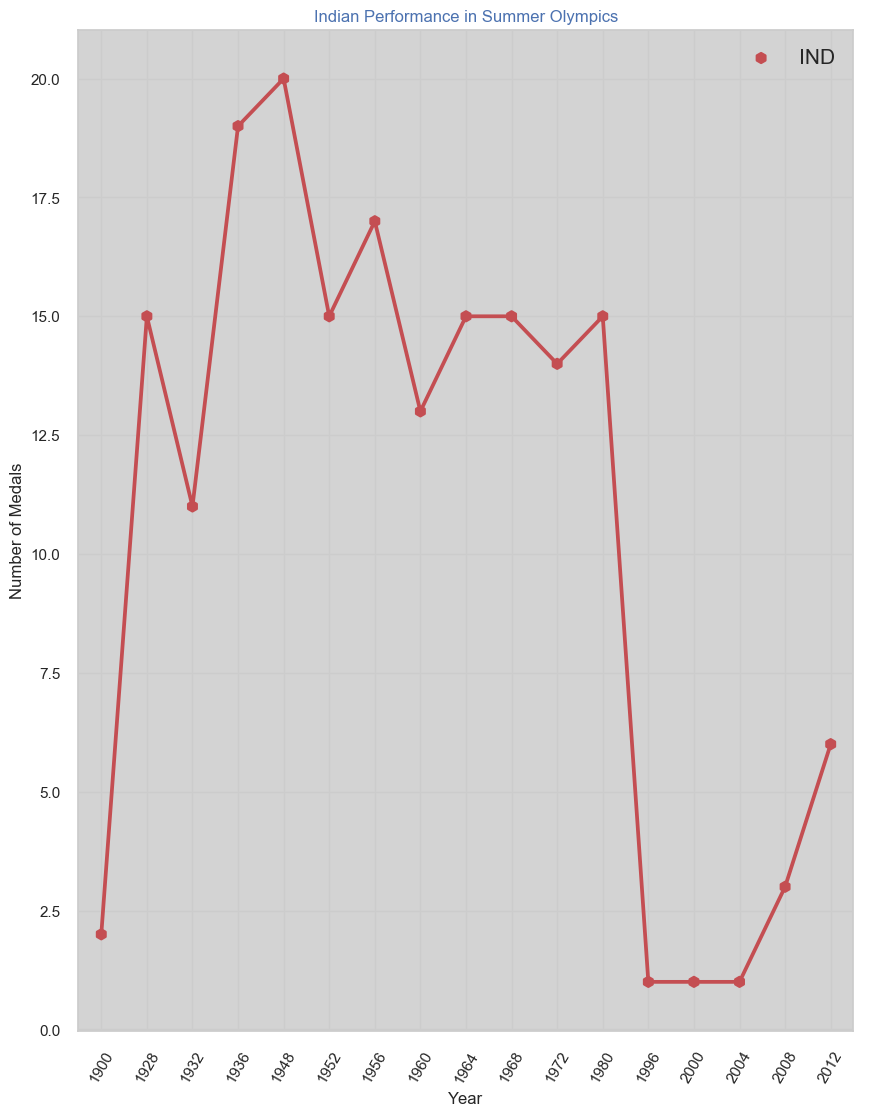

In [51]:
#.	Performance of India in Olympics vs Gender ?
India_df= Olympics_df[Olympics_df['Country']=='IND'].groupby(['Year','Country'])['Medal'].count()
India= India_df.reset_index()

ax = sns.pointplot(x = India["Year"] , y = India["Medal"],
                   markers="h" ,hue = India["Country"],palette = ["r","b"])

#Displaying values on bar
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1),fontsize=11)
    
plt.grid(True)
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Indian Performance in Summer Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})
plt.savefig("IndianPerformance.png")


<a id=section4101></a>
### Top 10 Indian Athlete in Olympic History

Top 5 Indian Athlete in Olympic History

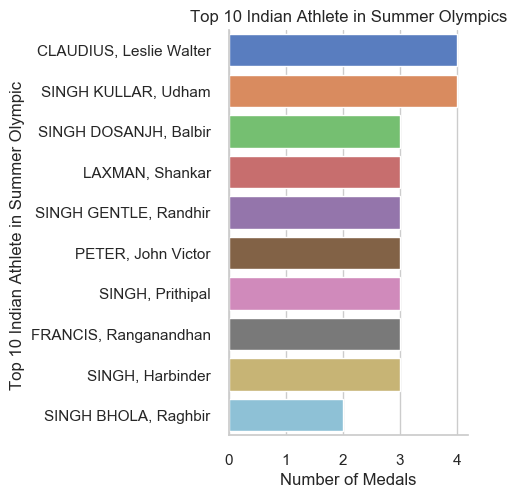

In [50]:
#Top Five Athlete in Olympic History
Top10IndianAthlete = Olympics_df[Olympics_df['Country']=='IND'].groupby("Athlete")['Medal'].count().sort_values(ascending=False).reset_index().head(10)
Top10IndianAthlete


ax= sns.catplot(x='Medal',y='Athlete',data=Top10IndianAthlete,kind='bar',palette='muted')
ax.set_xlabels("Number of Medals")
ax.set_ylabels("Top 10 Indian Athlete in Summer Olympic ")
plt.title('Top 10 Indian Athlete in Summer Olympics')
plt.savefig("Indiamen.png")


<a id=section411></a>
### Which Athlete won the maximum numberof Gold in Swimming ?

In [49]:
#9.	Which country won max number of medals in Swimming 
Olympics_df[Olympics_df["Discipline"]=="Swimming"].groupby('Country')['Medal'].count().argmax()

#9.	Which Athelte won max number of medals in Swimming 
Olympics_df[Olympics_df["Discipline"]=="Swimming"].groupby('Athlete')['Medal'].count().argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """


'PHELPS, Michael'

<a id=sectio412n></a>
### Top 10 Athlete in Olympic history

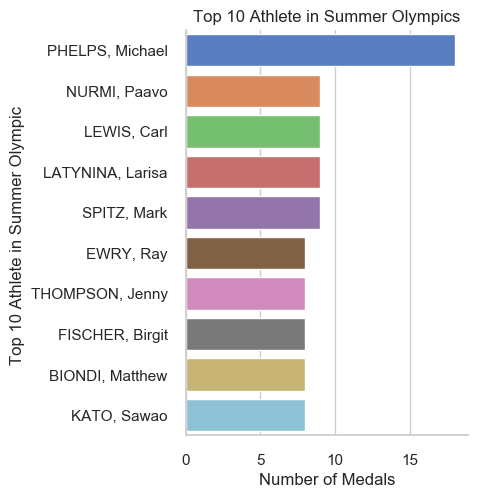

In [48]:
# Top 10 Athlete in Olympic history

Top10Athlete = Olympics_df[Olympics_df['Medal']=='Gold'].groupby("Athlete")['Medal'].count().sort_values(ascending=False).reset_index().head(10)

ax= sns.catplot(x='Medal',y='Athlete',data=Top10Athlete,kind='bar',palette='muted')
ax.set_xlabels("Number of Medals")
ax.set_ylabels("Top 10 Athlete in Summer Olympic ")
plt.title('Top 10 Athlete in Summer Olympics')
plt.savefig("men.png")

<a id=section413></a>
### Top 10 Women Athlete in Olympic History

Top 10 women Athlete in Olympic history

In [ ]:
# Top 10 Women Athlete in Olympic history

Top10WomenAthlete = Olympics_df[(Olympics_df['Medal']=='Gold') & 
                                (Olympics_df['Gender']=='Women')].groupby("Athlete")['Medal'].count().sort_values(ascending=False).reset_index().head(10)
Top10WomenAthlete.reset_index()
ax= sns.catplot(x='Medal',y='Athlete',data=Top10WomenAthlete,kind='bar',palette='muted')
ax.set_xlabels("Number of Medals")
ax.set_ylabels("Top 10 Women Athlete in Summer Olympic ")
plt.title('Top 10 Women Athlete in Summer Olympics')
plt.savefig("Women.png")

<a id=section414></a>
### 10 New Sports being added in Olympic history

10 New Sports that are being added in Olympics since 1896.\n
### Canoe/Kayak , Judo,VollyBall,Table Tennis,Caneo,Triathlon,Taekwando,Softball being some are the examples.

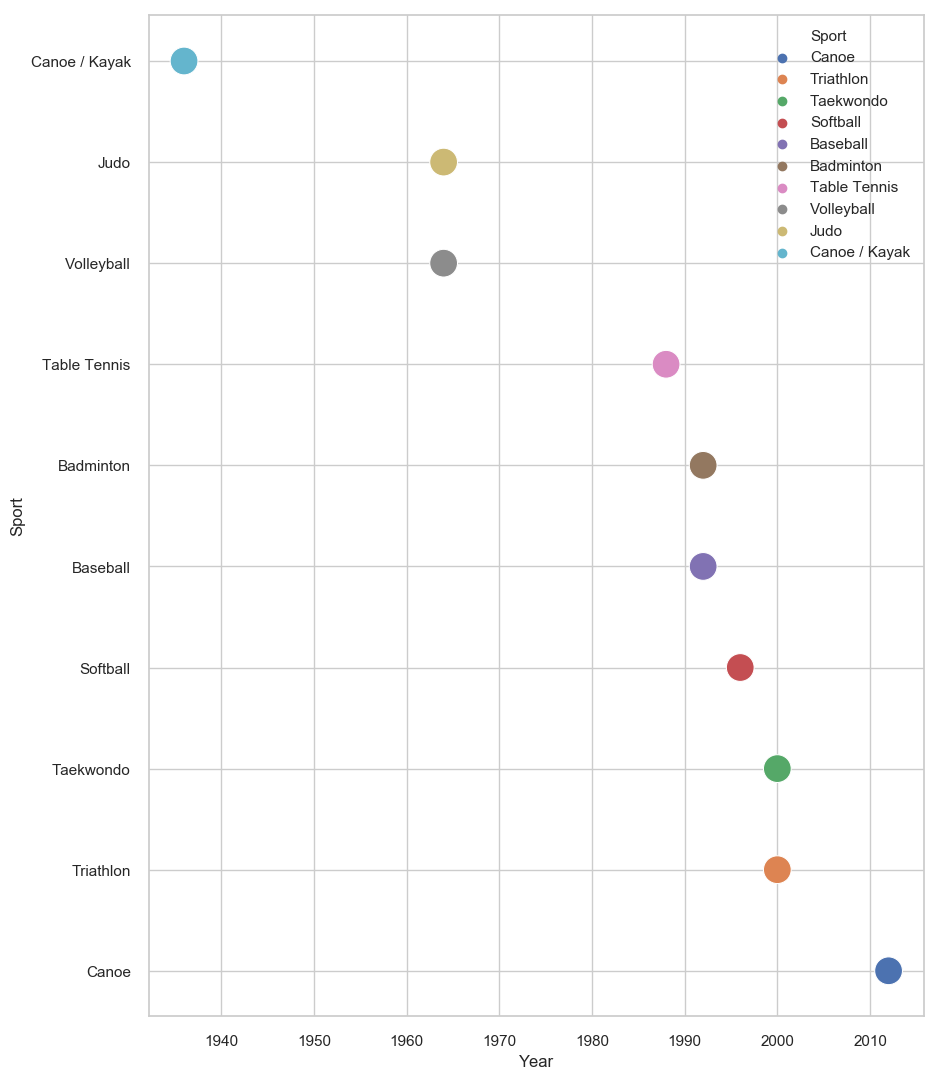

In [42]:
AdditionSport=Olympics_df.groupby("Sport")["Year"].min().sort_values(ascending=False).reset_index().head(10)
AdditionSport

sns.set(rc={'figure.figsize':(10,13)})
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Year', y = 'Sport', data = AdditionSport,s=400,hue='Sport') 
plt.savefig("NewSportAdd.png")

Top 5 Sports in Summer Olympics

In [41]:
#Top 5 Sports

grp1=Olympics_df.groupby(["Year","Discipline","Medal"])["City"].count().reset_index().rename(columns={'City':'Count'}).sort_values(ascending=False,by='Count')

grp1[grp1["Medal"]=='Gold']['Discipline'].drop_duplicates().head(10)


261     Artistic G.
1994       Swimming
312         Sailing
315        Shooting
2033      Athletics
1247         Rowing
258         Archery
1715       Football
1964         Hockey
1607       Handball
Name: Discipline, dtype: object

In [ ]:
#Unique Sports
Olympics_df.Discipline.drop_duplicates()

Number of Distinct Events in each Sport by Year

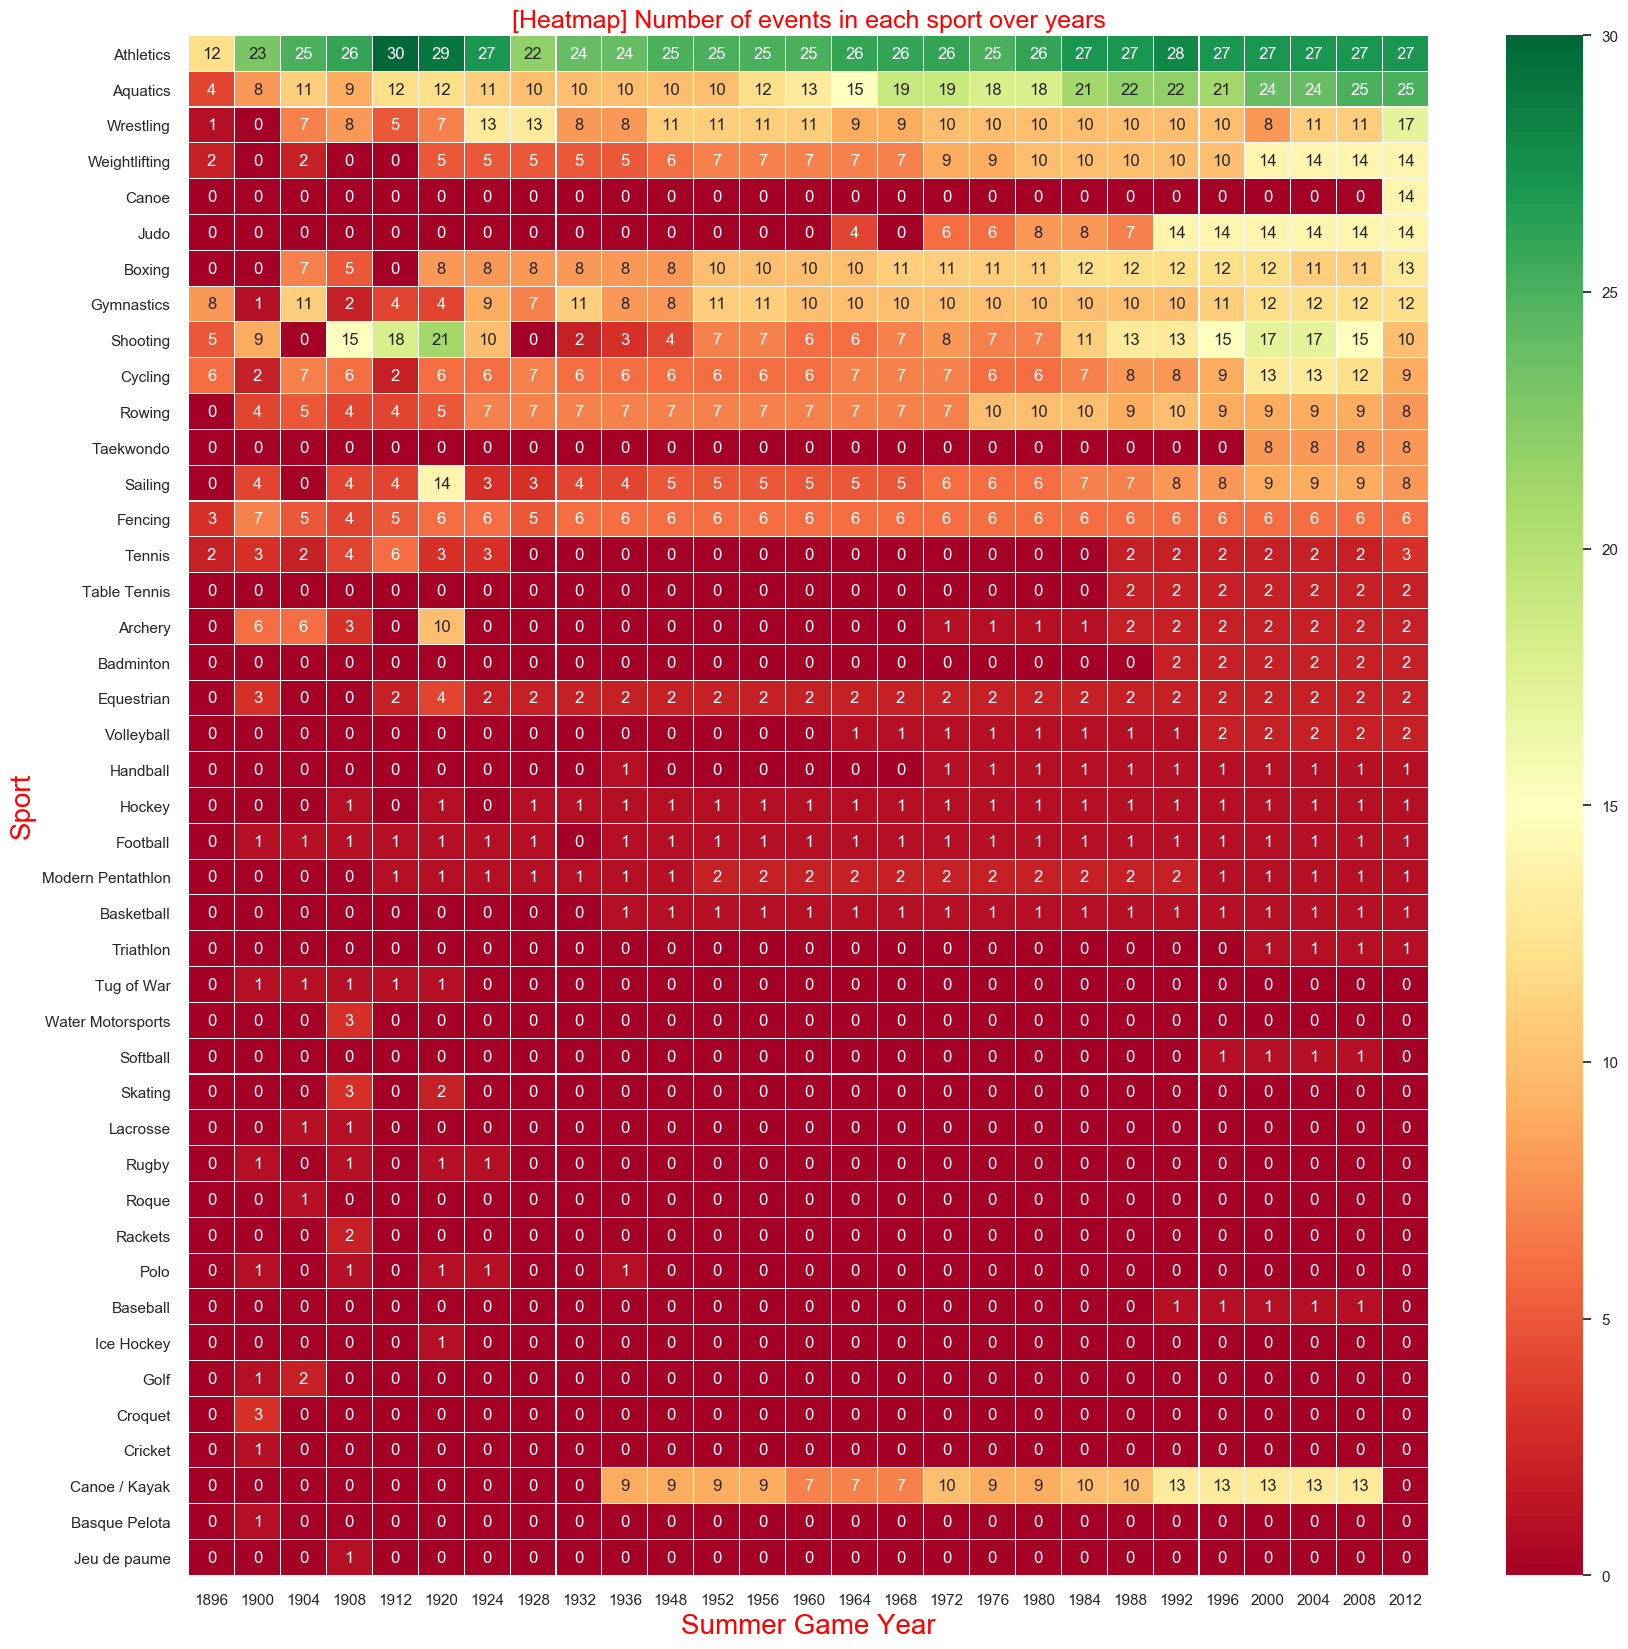

In [45]:
sport_year =Olympics_df.pivot_table(Olympics_df, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")

sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2012, ascending=False).index)


f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=20, color="red")
ax.set_ylabel('Sport', size=20, color="red")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="red")
plt.savefig("EventsperSport.png")
plt.show()

# <a id=section600></a>
### Conclusion

In Conclusion -

- The Olympics games being held for __27 times__ since 1896 and __22 different cities__ around the world hosted the games.
	- __London hosted the games maximum of 3 times__ , whereas __Paris,Athens,Los Angeles hosted more than once__.
- The participation level also increase dramitically in Olympics from 1896 onwards. It was 10 countries participated in FIRST Olympics games
which rises to 86 Nations world wide by the year 2012. There is higly upwards trends and Olympics again 
Popularity in few years from start.

- The Medal won count increases over the period and from 1964, more than 1000 medals won by athletes in different events which rises close to 2000 medals.
- __Australia,Great Britain,USA__ were dominating countries in MAX medal won count.
- __URS,USA,GBR__ are the Countries with __Maximum Number of Gold Medals__ in History
- From 1988 onwards, on an average 500 medals being won by different countries.
- _Canoe,Trithalon,Teakwondo,Softball__ are the __Newest games added__ to Olympics.
- __Athletics,Aquatics__ were the Sports with __maximum events.__
- Men were dominating in bagging Olympics medals but women Athlete also pick up the pace with time.
    __73%__ Men
    __27%__ Women
- Women Athlete Performance increased significantly over the period.
- __LATYINA Laisa, Thompson Jenny,FISCHER__ Birgit are the TOP THREE women Athlete.
- 
- __Michael PHELPS , Paavo NURMI,Carl LEWIS__ are the TOP THREE Men Athletes.
- __Indian Olympics Performance was good from 1928 to 1956 with on average 15 Medals per Olympics__
- __Indian Performance dropped from 1980 to 1996 with ZERO medal and gain momentum from 1996 onwards__
- __Leslie Walter Claudius was the first Indian to bag MEDAL in Olympics followed by UDHAM Singh Kullar,Balbir Singh Dosanjh__

- __Overall Participation Level, Medal Won count increased with time and showing a healthy rising trends which means people are concious about gaming.__
- __In recent years more and more events being added to Olympics games__
  